# Supervised Machine Learning 1: Introduction to Classification Problems

Some of the examples in this notebook are modified from the book Introduction to Machine Learning with Python by Müller and Guido:

https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/

### Overview

As we learned in the overview lecture, supervised learning is the realm of predictive modeling. The game here is build a model that can be used to predict a target variable $y$ given a set of data variables $X$. There are two basic types of supervised learning problems: *classification*, where we are trying to predict a categorical variable (e.g., a color or dog vs. cat) and *regression*, where we are trying to predict a continuous variable (e.g., the price of a movie or the score of a basketball game). 

Today's notebook will focus on classification, first with conceptual examples to build intuition, and then using a widely used Python package called `scikit-learn` to setup and train machine learning models. The `scikit-learn` webpage is a great place to learn fundamental machine learning concepts, and I encourage you all to check it out!

https://scikit-learn.org/stable/index.html

In [1]:
# basic python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

# scikit-learn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

# we'll make some plots in seaborn
import seaborn as sns; sns.set()

### Setup 

To start, we'll generate some random data from four classes (ok, blobs). We can then study classification algorithms to predict which data point corresponds to each class/blob.

In [2]:
# Make some data to practice with
Xblob, yblob = make_blobs(n_samples=300, centers=4, cluster_std=0.80, random_state=0)

# Put the result in a dataframe (for seaborn)
df_blob = pd.DataFrame(Xblob, columns=['xvalue', 'yvalue'])  
df_blob["blob"] = yblob
df_blob

,xvalue,yvalue,blob
0,0.430720,2.549258,1
1,-1.468792,7.267678,3
2,1.214861,5.364896,0
3,-0.942070,7.808066,3
4,1.010046,2.224168,1
...,...,...,...
295,1.946508,1.807177,1
296,2.672700,1.556467,1
297,0.259897,4.613309,0
298,0.908723,7.776320,3


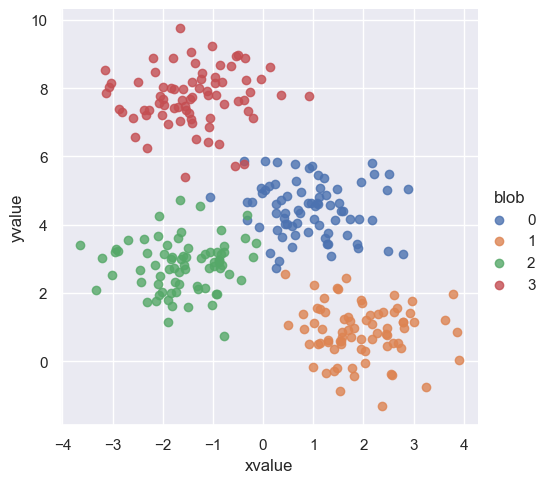

In [3]:
# seaborn lmplot color coding by blob number
sns.lmplot(x="xvalue", y="yvalue", hue='blob', data=df_blob, fit_reg=False);

### Nearest Neighbor Classifier

The _Nearest Neighbor Classifier_ is one of the simplest classifiers you could think of. The idea here is to assign each test data point to the same class as the nearest point (by distance) in the training set. For example, if the nearest training point is blue, then the classifier will predict blue for the test data point.

We'll evenually use `sklearn` to do this, but it helps to code things up once by hand to understand the concepts.

In [4]:
## Define a function to compute the euclidean distance between a point x and matrix X
def distances(x, X):
    return np.sqrt( np.sum( np.square(x - X), axis=1) )

#### Example: Find the classification of points [2,0] and [-0.5,4] from their nearest neighbor.

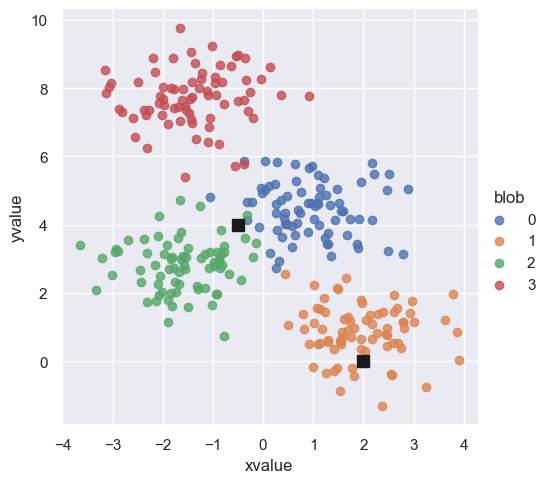

In [5]:
# Plot, color coding by cluster number
sns.lmplot(x="xvalue", y="yvalue", hue='blob', data=df_blob, fit_reg=False)

# add two test points
plt.plot(2, 0, 'ks', markersize=8)
plt.plot(-0.5, 4, 'ks', markersize=8);

In [6]:
# [2,0] is in the orange blob 1
xtest = np.array([2, 0]) # our testing data
dist = distances(xtest, Xblob) # distance from [2, 0] to all training points
k1 = np.argsort(dist) # sorting order
print(xtest, "is in blob", yblob[k1[0]]) # class of the closest point

[2 0] is in blob 1


In [7]:
# [-0.5,4] is (barely) in the blue blob 0 by this metric
xtest = np.array([-0.5, 4]) # our testing data
dist = distances(xtest, Xblob) # distance from [2, 0] to all training points
k2 = np.argsort(dist) # sorting order
print(xtest, "is in blob", yblob[k2[0]]) # class of the closest point

[-0.5  4. ] is in blob 0


### K-Nearest Neighbors 

This is similar to the _Nearest Neighbor Algorithm_, but it finds the K nearest neighbors (e.g., 3 or 5) and assigns the classification based on the 'majority vote'.

In [8]:
# [2,0] is definitely in the orange blob 1
xtest = np.array([2,0]) # our testing data
dist = distances(xtest, Xblob) # distance to all training points
k = np.argsort(dist) # sorting order
print("5 Nearest neighbors are in:", yblob[k[0:5]]) # classes of 5 closest points

5 Nearest neighbors are in: [1 1 1 1 1]


In [9]:
# [-0.5,4] is (barely) in the green blob 2 by this metric
xtest = np.array([-0.5, 4]) # our testing data
dist = distances(xtest, Xblob) # distance to all training points
k = np.argsort(dist) # sorting order
print("5 Nearest neighbors are in:", yblob[k[0:5]]) # classes of 5 closest points

5 Nearest neighbors are in: [0 2 2 2 0]


### Now let's use `sklearn's` KNeighborsClassifier!

That way, we don't have to do these classifications by hand!

#### In practice, we use the following steps when we test a classifier:
* Split data into a training set and a testing set.
* Fit classifier model to the training set.
* Calculate model predictions for the testing set. 
* Examine the accuracy of model.

In [10]:
# Split the data (70-30 train-test)
Xtrain, Xtest, ytrain, ytest = train_test_split(Xblob, yblob, train_size=0.7, test_size=0.3, random_state=42)

In [11]:
# Fit the classifier model to the training set
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [12]:
# Calculate model predictions for the testing set
y_model = model_knn.predict(Xtest)

In [13]:
# Can also fit and predict in one step
y_model = model_knn.fit(Xtrain, ytrain).predict(Xtest)

#### Evaluating the model prediction.

The simplest metric is the $Accuracy = N_{correct}/N_{total}$ of the testing dataset.

In [14]:
# Examine the accuracy of the model
accuracy_score(ytest, y_model)

0.9666666666666667

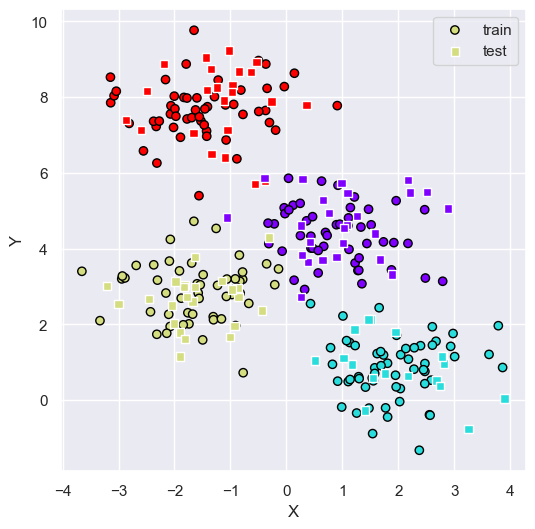

In [15]:
# Plot results
plt.figure(figsize=(6,6))
plt.scatter(Xtrain[:,0], Xtrain[:,1], c=ytrain, cmap='rainbow', # plot training data
            marker='o', linewidth=1, edgecolors='black', label="train")
plt.scatter(Xtest[:,0], Xtest[:,1], c=ytest, cmap='rainbow', # plot testing data
            marker='s', linewidth=1, edgecolors='white', label="test")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="upper right");

True label 3 KNN label 0
True label 3 KNN label 0
True label 2 KNN label 0


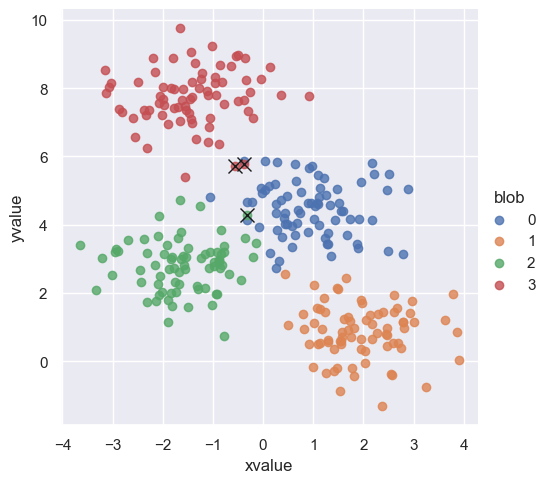

In [16]:
## Plot the test points that were incorrectly classified

# first, plot all data
sns.lmplot(x="xvalue", y="yvalue", hue='blob', 
           data=df_blob, fit_reg=False);

# now mark the misses
for i in range(len(ytest)):
    if ytest[i] != y_model[i]:
        plt.plot(Xtest[i,0], Xtest[i,1], 'xk', markersize=10)
        print('True label', ytest[i], 'KNN label', y_model[i])

#### Calculate the confusion matrix. 

A confusion matrix is a graphical representation of classifier performance, with true labels as the rows and the predicted labels as the columns. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The greater the percentage of values on the diagonal of the confusion matrix the better, indicating many correct predictions.

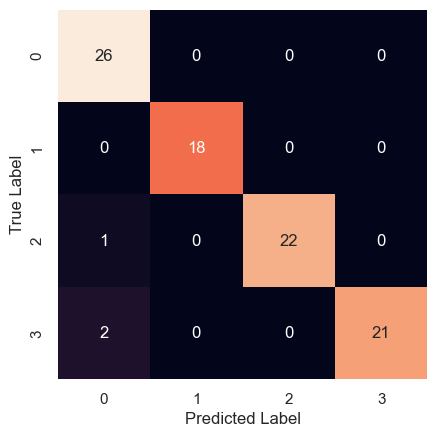

In [17]:
# Calculate and plot confusion matrix

# sklearn does this for you
mat = confusion_matrix(ytest, y_model)

# plot as a seaborn heatmap
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = np.unique(yblob), yticklabels = np.unique(yblob));
plt.ylabel('True Label')
plt.xlabel('Predicted Label');

## Gaussian Naive Bayes Classifier:

This classifier operates under the assumption that data from each class is drawn from a Gaussian distribution (a bell curve, possibly in multiple dimensions). Conceptually, the algorithm fits a mini bell curve (Gaussian) to each blob of training data. Then the model predictions for a given test point come from the relative heights of the bell curves derived from the training data and corresponding to different classes. The class with the tallest curve for a given test point is the class predicted by the model. 

We'll first implement a simplified version of the algorithm by hand, before using the `scikit-learn` (which is much easier!).

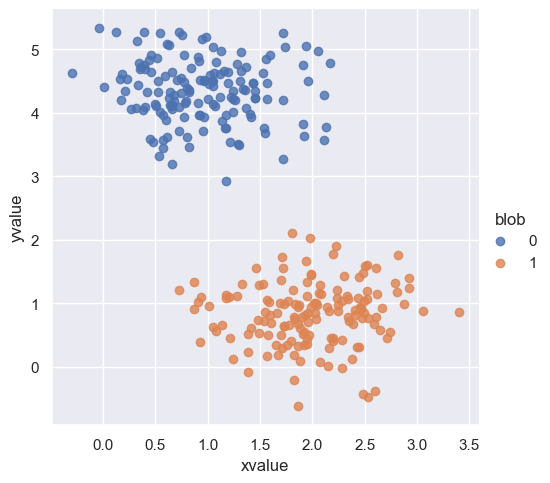

In [18]:
# Let's make some simple data to understand the concepts
Xblob2, yblob2 = make_blobs(n_samples=300, centers=2, cluster_std=0.50, random_state=0)

# Put the result in a dataframe
df_blob2 = pd.DataFrame(Xblob2, columns=['xvalue', 'yvalue'])  
df_blob2["blob"] = yblob2

# Plot the data
sns.lmplot(x="xvalue", y="yvalue", hue='blob', data=df_blob2, fit_reg=False);

### This dataset is easy to separate in 2D, but imagine we had access to just 1D: the x-axis. 

The GNB classifier approach would then fit a bell curve to x-values for the two classes, and use the relative heights of the bell curves to classify points. Below, we'll do this by hand to build some intuition.

[Don't worry about the details in these cells, just the concepts]

In [19]:
### Characterize statistics of x-values of the two blobs
#    ---> Fits Bell Curves to Data

# setup
k = 2 # number of classes
mu = np.zeros(k) # means
var = np.zeros(k) # variances
pi = np.zeros(k) # class weights

# class labels
k0 = yblob2 == 0
k1 = yblob2 == 1

# calculate means for each class
mu[0] = np.mean(Xblob2[k0,0])
mu[1] = np.mean(Xblob2[k1,0])

# calculate variances for each class
var[0] = np.var(Xblob2[k0,0])
var[1] = np.var(Xblob2[k1,0])
std = np.sqrt(var)

# calculate class weights (fraction in each)
pi[0] = float(sum(k0)) / float(len(yblob2))
pi[1] = float(sum(k1)) / float(len(yblob2))


#### With these functions in hand, we could compute the probability that a test point belongs to either class.

[Don't worry about the details in this cell]

In [20]:
# test points
xtest = [0, 1, 2, 3]

# pdfs (i.e., height of curves) at each test
p0 = pi[0]*norm.pdf(xtest, mu[0], std[0])
p1 = pi[1]*norm.pdf(xtest, mu[1], std[1])

# compute the class probabilities: from the height of pdf at each point
for xi, p0i, p1i in zip(xtest, p0, p1):
    mystr = 'x = {:.1f}, P(clust0) = {:4.1f}, P(clust1) = {:4.1f}'.format(
        xi, 100*p0i/(p0i+p1i), 100*p1i/(p0i+p1i))
    print(mystr)

x = 0.0, P(clust0) = 99.7, P(clust1) =  0.3
x = 1.0, P(clust0) = 86.8, P(clust1) = 13.2
x = 2.0, P(clust0) =  9.9, P(clust1) = 90.1
x = 3.0, P(clust0) =  0.2, P(clust1) = 99.8


This graphical cell should give some intuition for how the code works.

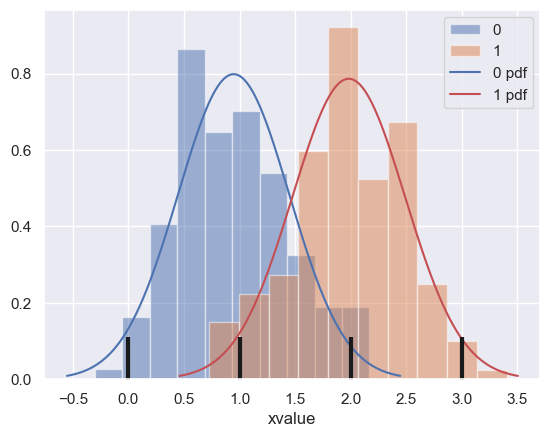

In [21]:
# Plot Distribution of X-values

# data histograms
plt.hist(Xblob2[k0,0], alpha=0.5, label='0', density=True)
plt.hist(Xblob2[k1,0], alpha=0.5, label='1', density=True)

# Gaussian fits
x_axis0 = np.linspace(mu[0] - 3*std[0], mu[0] + 3*std[0], 1000)
x_axis1 = np.linspace(mu[1] - 3*std[1], mu[1] + 3*std[1], 1000)
plt.plot(x_axis0, norm.pdf(x_axis0, mu[0], std[0]), color="b", label='0 pdf')
plt.plot(x_axis1, norm.pdf(x_axis1, mu[1], std[1]), color="r", label='1 pdf')

# test points
for xx in xtest:
    plt.plot(xx, 0, "k|", mew=3, ms=60)

# Format plot
plt.xlabel('xvalue')
plt.legend(loc='best');

### Now that we get the concepts, we'll use the `sklearn` `GaussianNB` module for ML.

Here, `sklearn` is a handy implementation for the ideas we coded by hand above, particular when we are dealing with datasets in higher dimensions.

For practice, let's review the four cluster example from before.

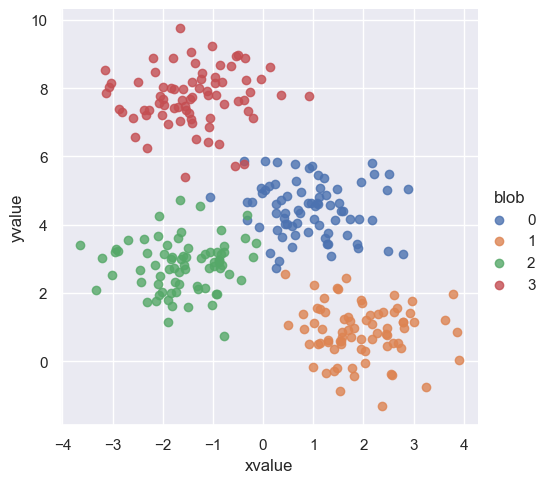

In [22]:
# remember this data?
sns.lmplot(x="xvalue", y="yvalue", hue='blob', data=df_blob, fit_reg=False);

With the data in hand, let's split into training and testing and fit a GNB model to the training set. After training, the model can classify points by the relative height of the bell curves. Unlike the conceptual example above, the bell curves here will be 2D (the same dimensionality of the training data).

In [23]:
# We have already split the data, but repeating here for consistency
Xtrain, Xtest, ytrain, ytest = train_test_split(Xblob, yblob, train_size=0.7, test_size=0.3)

# Instantiate model
model_gb = GaussianNB()

# fit model to training data, predict on testing data
y_model = model_gb.fit(Xtrain, ytrain).predict(Xtest)

# compute accuracy score
accuracy_score(ytest, y_model)      

0.9555555555555556

-0.4  5.8 True label 3, GNB label 0
-0.6  5.7 True label 3, GNB label 0
 0.4  2.5 True label 1, GNB label 0
-1.6  5.4 True label 3, GNB label 2


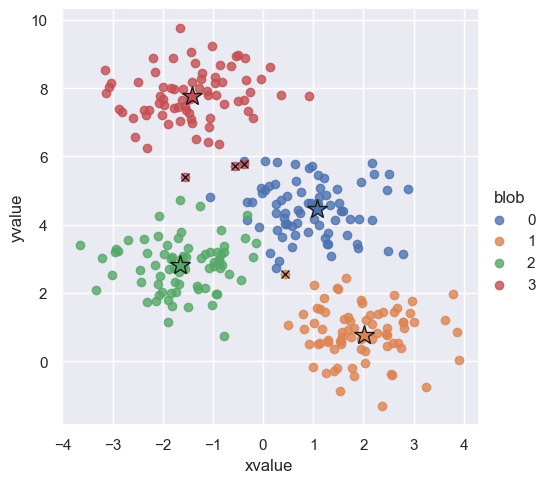

In [24]:
# Plot all data
sns.lmplot(x="xvalue",y="yvalue", hue='blob', data=df_blob, fit_reg=False);

# plot the means for each class
for i in range(4):
    plt.plot(model_gb.theta_[i,0], model_gb.theta_[i,1], "*", ms=15, mec="k")

# Plot the test points that were incorrectly classified
for i in range(len(ytest)):
    if ytest[i] != y_model[i]:
        plt.plot(Xtest[i,0], Xtest[i,1], 'xk')
        print('{:4.1f} {:4.1f} True label {:1.0f}, GNB label {:1.0f}'.format(
            Xtest[i,0], Xtest[i,1], ytest[i], y_model[i]))

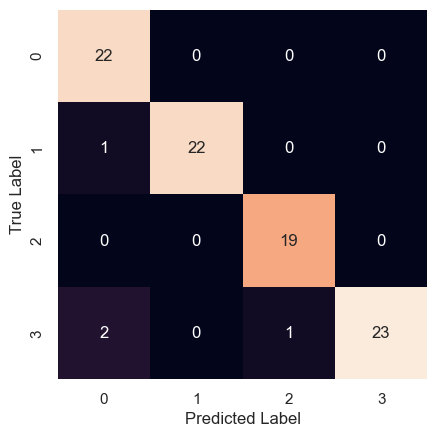

In [25]:
# Compute confusion matrix
mat = confusion_matrix(ytest, y_model)

# plot heatmap
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=np.unique(yblob), yticklabels=np.unique(yblob));
plt.ylabel('True Label')
plt.xlabel('Predicted Label');

One handy aspect of many classifiers is that they output class probabilities for each data point. These are basically the relative heights of each bell curve at each data point. We can use this to study what went wrong for our mislabeled points, for example.

In [26]:
# Get predicted classes for test points
pred_gb = model_gb.predict_proba(Xtest)

# Print probabilities for incorrectly classified points
print('{:^5s} {:^5s} {:^5s} {:^5s}'.format('0', '1', '2', '3'))
for i in range(len(ytest)):
    if ytest[i] != y_model[i]:
        print('{:5.3f} {:5.3f} {:5.3f} {:5.3f} True {:1.0f} GNB {:1.0f}'.format(
            pred_gb[i,0], pred_gb[i,1], pred_gb[i,2], pred_gb[i,3], ytest[i], y_model[i]))

  0     1     2     3  
0.837 0.000 0.005 0.158 True 3 GNB 0
0.823 0.000 0.011 0.165 True 3 GNB 0
0.467 0.104 0.429 0.000 True 1 GNB 0
0.304 0.000 0.457 0.238 True 3 GNB 2


# Summary
* Supervised learning: train models to predict target variables, uses training data as examples to learn from.
* Classification: supervised learning to predict a categorical variable or class (e.g. a color).
* `sklearn`: user-friendly Python ML package with many built-in techniques
* ML workflow: assemble data/feature matrix, train-test split, fit model, evaluate accuracy
* Classification methods covered today: KNN, Naive Bayes (there are *many* others)
* K-Nearest Neighbors: a simple classifier based on the characteristics of the closest data points
* Gaussian Naive Bayes: fits bell curves to data and classifies points based on curve height
* Evaluating classifiers: examine accuracy statistics, confusion matrix. (Also consider precision, recall, F1).